# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** AutoKeras for Classification and Regression

</font>
</div>

# What is AutoKeras?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- **AutoKeras** is an open-source library for performing AutoML for deep learning models. 
- AutoKeras automaticall searcg for the best:
    - model architecture and 
    - the hyperparameters
- This search is generally collectively known as neural architecture search.

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [16]:
import shutil
from numpy import asarray
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from autokeras import StructuredDataClassifier, StructuredDataRegressor
from keras.utils.vis_utils import plot_model

# AutoKeras for Classification
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Sonar dataset for classifying sonar returns as rocks or mines. 
- This dataset consists of 208 rows of data with 60 input features and a target class label of 0 (rock) or 1 (mine).
- AutoKeras uses this method `StructuredDataClassifier` to find the best architecture. 
- We'll pass argument `overwrite=True` and `max_trials=5` to get rid of the less perfoming architectures and try out 5 different ones.

</font>
</div>

In [10]:
# load dataset
path = '../DATASETS/sonar.csv'
dataframe = read_csv(path, header=None)
print(dataframe.shape)

# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

# basic data preparation
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

# separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# define the search
search = StructuredDataClassifier(overwrite=True, max_trials=5)

# perform the search
search.fit(x=X_train, y=y_train, verbose=0)

# evaluate the model
loss, acc = search.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

# use the model to make a prediction
row = [0.0200, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.0660, 0.2273, 0.3100, 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.5550, 0.6711, 0.6415, 0.7104, 0.8080, 0.6791, 0.3857,
       0.1307, 0.2604, 0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744, 0.0510, 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343, 0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167, 0.0180, 0.0084, 0.0090, 0.0032]
X_new = asarray([row]).astype('float32')
yhat = search.predict(X_new)
print('Predicted: %.3f' % yhat[0])

# get the best performing model
model = search.export_model()


(208, 61)
(208, 60) (208,)
(139, 60) (69, 60) (139,) (69,)
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
5/5 [==============================] - 1s 2ms/step - loss: 0.7966 - accuracy: 0.4245
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.5180
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.6043
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6906
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.7626
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.8129
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.8201
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.8489
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8633
Epoch 10/10
5/5 [======================

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 60)                0         
_________________________________________________________________
normalization (Normalization (None, 60)                121       
_________________________________________________________________
dense (Dense)                (None, 32)                1952      
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

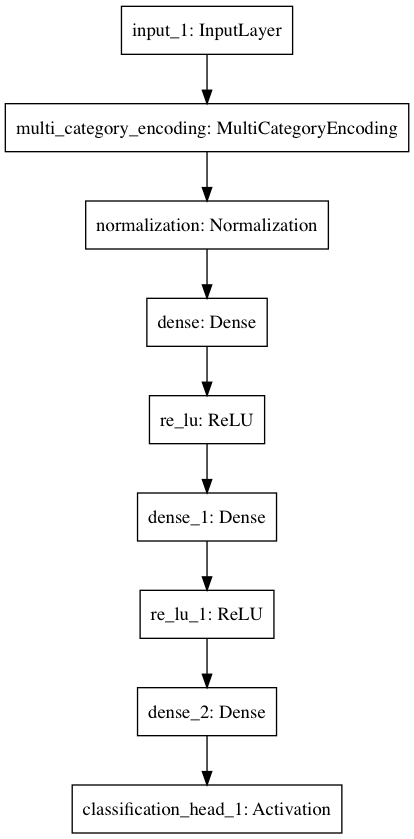

In [15]:
plot_model(model)

# AutoKeras for Regression
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Auto insurance dataset that involves predicting the total payment from claims given the total number of claims. 
- The dataset has 63 rows and one input and one output variable.
- AutoKeras uses this method `StructuredDataRegressor` to find the best architecture. 
- We'll pass argument `overwrite=True` and `max_trials=5` to get rid of the less perfoming architectures and try out 5 different ones.

</font>
</div>

In [18]:
# load dataset
path = '../DATASETS/auto-insurance.csv'
dataframe = read_csv(path, header=None)
print(dataframe.shape)

# split into input and output elements
data = dataframe.values
data = data.astype('float32')
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

# separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# define the search
search = StructuredDataRegressor(overwrite=True, max_trials=5, loss='mean_absolute_error')

# perform the search
search.fit(x=X_train, y=y_train, verbose=0)

# evaluate the model
mae, _ = search.evaluate(X_test, y_test, verbose=0)
print('MAE: %.3f' % mae)

# use the model to make a prediction
X_new = asarray([[108]]).astype('float32')
yhat = search.predict(X_new)
print('Predicted: %.3f' % yhat[0])

# get the best performing model
model = search.export_model()

(63, 2)
(63, 1) (63,)
(42, 1) (21, 1) (42,) (21,)
INFO:tensorflow:Oracle triggered exit
Epoch 1/12
2/2 [==============================] - 0s 2ms/step - loss: 88.0794 - mean_squared_error: 13856.4521
Epoch 2/12
2/2 [==============================] - 0s 3ms/step - loss: 84.6882 - mean_squared_error: 13058.8867
Epoch 3/12
2/2 [==============================] - 0s 2ms/step - loss: 74.4003 - mean_squared_error: 10617.2715
Epoch 4/12
2/2 [==============================] - 0s 3ms/step - loss: 57.2302 - mean_squared_error: 6356.8242
Epoch 5/12
2/2 [==============================] - 0s 2ms/step - loss: 44.2423 - mean_squared_error: 2825.5820
Epoch 6/12
2/2 [==============================] - 0s 2ms/step - loss: 46.4076 - mean_squared_error: 3256.5398
Epoch 7/12
2/2 [==============================] - 0s 2ms/step - loss: 37.8165 - mean_squared_error: 2721.7668
Epoch 8/12
2/2 [==============================] - 0s 3ms/step - loss: 35.8196 - mean_squared_error: 1872.6439
Epoch 9/12
2/2 [=============

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 1)                 0         
_________________________________________________________________
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 32)                64        
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

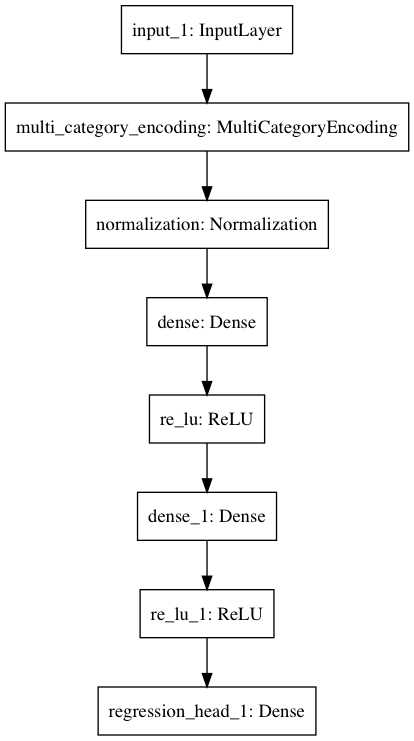

In [20]:
plot_model(model)

# Clean up the folder
<hr style="border:2px solid black"> </hr>

In [22]:
try:
    shutil.rmtree("./structured_data_classifier")
except:
    pass
try:
    shutil.rmtree("./structured_data_regressor")
except:
    pass
try:
    os.rm("model.png")
except:
    pass

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/autokeras-for-classification-and-regression/
- [Sonar dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv')
- [Auto Insurnace claim](https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv)
- https://autokeras.com/tutorial/structured_data_classification/

</font>
</div>